In [ ]:
import sys
import subprocess

# upgrade pip and install required packages
subprocess.check_call([sys.executable, "-m", "pip", "install", "--upgrade", "pip"])
subprocess.check_call([sys.executable, "-m", "pip", "install", "pandas", "numpy", "matplotlib", "seaborn", "scikit-learn"])

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score,roc_curve,precision_score,recall_score

In [2]:
df = pd.read_csv("model_snapshots.csv")
df.head(20)
df = df.drop('customer_id',axis = 1)
df.sample(20)

,snapshot_month,util_avg_3m,payment_ratio_avg_3m,max_outstanding_3m,avg_txn_amt_3m,avg_txn_count_3m,late_payments_3m,missed_due_count_3m,missed_due_last_1m,payment_ratio_last_1m,...,bnpl_active_last_1m,default_next_1m,age,employment_status,education_level,monthly_income,city_tier,dependents,residence_type,account_age_months
52130,6,0.250000,0.796667,3887,1952.666667,1.666667,2,1,0,1.00,...,0,0,59,Salaried,Primary,25420,Tier-1,4,Owned,26
59493,7,0.413333,0.783333,6192,1746.666667,2.000000,2,1,1,0.41,...,1,0,40,Salaried,Postgraduate,38671,Tier-3,1,Rented,34
86820,10,0.440000,0.766667,11356,1311.333333,2.333333,2,2,1,0.52,...,1,0,59,Salaried,High School,89714,Tier-2,2,Owned,85
17365,8,0.326667,0.736667,8126,1629.333333,1.333333,2,1,1,0.41,...,1,0,62,Retired,Secondary,46480,Tier-1,2,Rented,50
81626,9,0.426667,0.823333,9166,1339.000000,2.333333,2,1,0,0.94,...,1,0,59,Business,No Formal Education,69931,Tier-1,1,Owned,107
51152,9,0.503333,0.840000,14492,1694.333333,3.000000,3,1,1,0.73,...,1,0,37,Daily Wage,High School,20008,Tier-2,1,Owned,39
39426,10,0.146667,0.963333,6500,736.000000,0.666667,1,0,0,1.00,...,0,0,29,Salaried,High School,33624,Tier-1,3,Rented,104
85919,9,0.183333,0.936667,8192,364.000000,1.666667,1,0,0,1.00,...,0,0,67,Retired,High School,42940,Tier-2,4,Rented,62
24528,7,0.630000,0.810000,7329,3472.666667,2.666667,3,2,1,0.78,...,1,1,46,Salaried,Primary,34979,Tier-3,0,Rented,16
80178,10,0.253333,0.726667,14723,1555.666667,2.000000,2,2,0,1.00,...,0,0,34,Salaried,High School,37358,Tier-2,1,Rented,69


In [3]:
df.shape

(90000, 21)

In [4]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 90000 entries, 0 to 89999
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   snapshot_month         90000 non-null  int64  
 1   util_avg_3m            90000 non-null  float64
 2   payment_ratio_avg_3m   90000 non-null  float64
 3   max_outstanding_3m     90000 non-null  int64  
 4   avg_txn_amt_3m         90000 non-null  float64
 5   avg_txn_count_3m       90000 non-null  float64
 6   late_payments_3m       90000 non-null  int64  
 7   missed_due_count_3m    90000 non-null  int64  
 8   missed_due_last_1m     90000 non-null  int64  
 9   payment_ratio_last_1m  90000 non-null  float64
 10  outstanding_delta_3m   90000 non-null  int64  
 11  bnpl_active_last_1m    90000 non-null  int64  
 12  default_next_1m        90000 non-null  int64  
 13  age                    90000 non-null  int64  
 14  employment_status      90000 non-null  str    
 15  education_lev

In [5]:
df.describe()

,snapshot_month,util_avg_3m,payment_ratio_avg_3m,max_outstanding_3m,avg_txn_amt_3m,avg_txn_count_3m,late_payments_3m,missed_due_count_3m,missed_due_last_1m,payment_ratio_last_1m,outstanding_delta_3m,bnpl_active_last_1m,default_next_1m,age,monthly_income,dependents,account_age_months
count,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.0000,90000.000000,90000.000000,90000.00000
mean,8.000000,0.392806,0.775385,8251.728089,1792.478707,2.248133,2.228100,1.481844,0.493978,0.775379,2356.808789,0.748689,0.198000,47.5380,49433.315300,2.016300,60.20340
std,2.582003,0.189962,0.114275,4625.002922,1217.738724,1.032904,0.758162,0.864864,0.499967,0.198209,1870.511208,0.433769,0.398494,16.0141,35976.278809,1.415788,34.75319
min,4.000000,0.000000,0.413333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.400000,0.000000,0.000000,0.000000,21.0000,10027.000000,0.000000,1.00000
25%,6.000000,0.256667,0.696667,4735.750000,889.000000,1.666667,2.000000,1.000000,0.000000,0.600000,814.000000,0.000000,0.000000,33.0000,26785.500000,1.000000,30.00000
50%,8.000000,0.386667,0.780000,7720.000000,1524.000000,2.333333,2.000000,1.000000,0.000000,0.800000,2008.000000,1.000000,0.000000,47.0000,40341.500000,2.000000,60.00000
75%,10.000000,0.526667,0.856667,11238.000000,2462.333333,3.000000,3.000000,2.000000,1.000000,1.000000,3558.000000,1.000000,0.000000,61.0000,55209.000000,3.000000,90.00000
max,12.000000,0.980000,1.000000,33829.000000,9244.333333,5.000000,3.000000,3.000000,1.000000,1.000000,11390.000000,1.000000,1.000000,75.0000,249805.000000,4.000000,120.00000


In [6]:
categorical_cols = [col for col in df.columns if df[col].dtype == 'object']
categorical_cols

numerical_cols = [col for col in df.columns if df[col].dtype != 'object']
numerical_cols

['snapshot_month',
 'util_avg_3m',
 'payment_ratio_avg_3m',
 'max_outstanding_3m',
 'avg_txn_amt_3m',
 'avg_txn_count_3m',
 'late_payments_3m',
 'missed_due_count_3m',
 'missed_due_last_1m',
 'payment_ratio_last_1m',
 'outstanding_delta_3m',
 'bnpl_active_last_1m',
 'default_next_1m',
 'age',
 'employment_status',
 'education_level',
 'monthly_income',
 'city_tier',
 'dependents',
 'residence_type',
 'account_age_months']

In [7]:
categorical_cols

[]

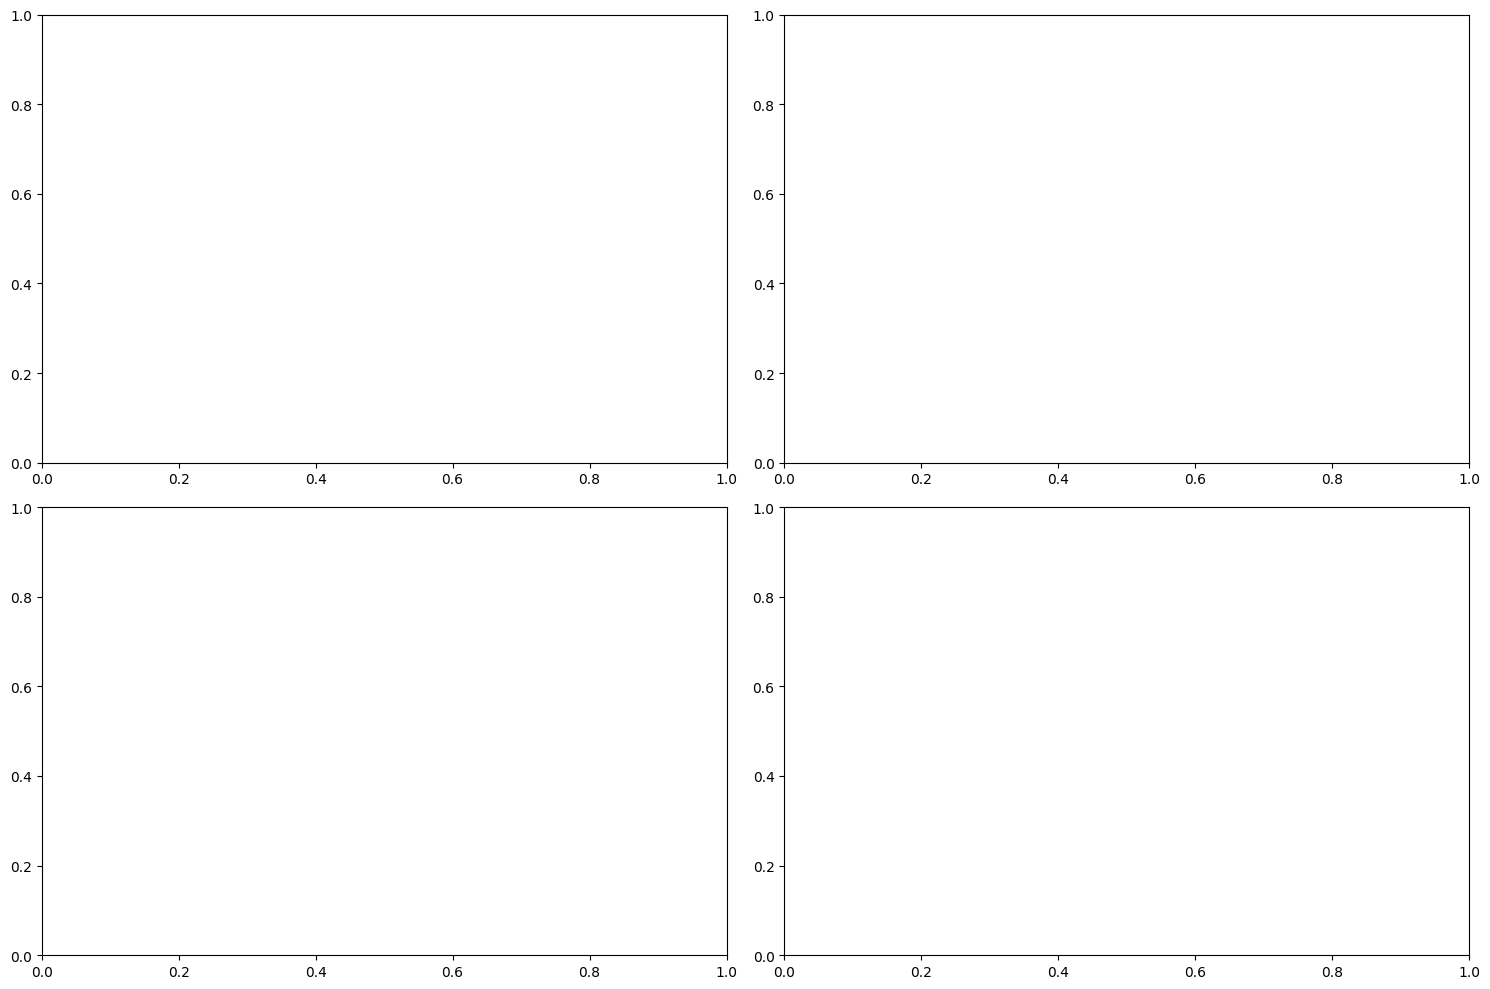

In [8]:
fig,axes = plt.subplots(2,2,figsize=(15,10))
axes = axes.flatten()

for i,col in enumerate(categorical_cols):
  df[col].value_counts().plot(kind='bar',ax=axes[i])
  axes[i].set_title(col)
  axes[i].set_xlabel(col)
  axes[i].set_ylabel('Count')
  axes[i].tick_params(axis='x',rotation=90)
  axes[i].set_xticklabels(axes[i].get_xticklabels(),rotation=90)

plt.tight_layout()
plt.show()


In [9]:
discrete_cols = ['snapshot_month','missed_due_count_3m','late_payments_3m','missed_due_last_1m','bnpl_active_last_1m','default_next_1m','dependents']
discrete_cols

['snapshot_month',
 'missed_due_count_3m',
 'late_payments_3m',
 'missed_due_last_1m',
 'bnpl_active_last_1m',
 'default_next_1m',
 'dependents']

In [10]:
df['missed_due_count_3m'].value_counts()

missed_due_count_3m
1    34165
2    33411
0    11631
3    10793
Name: count, dtype: int64

C:\Users\jenish\AppData\Local\Temp\ipykernel_2868\3910560479.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(axes[i].get_xticklabels(),rotation=90)
C:\Users\jenish\AppData\Local\Temp\ipykernel_2868\3910560479.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(axes[i].get_xticklabels(),rotation=90)
C:\Users\jenish\AppData\Local\Temp\ipykernel_2868\3910560479.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(axes[i].get_xticklabels(),rotation=90)
C:\Users\jenish\AppData\Local\Temp\ipykernel_2868\3910560479.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xtickla

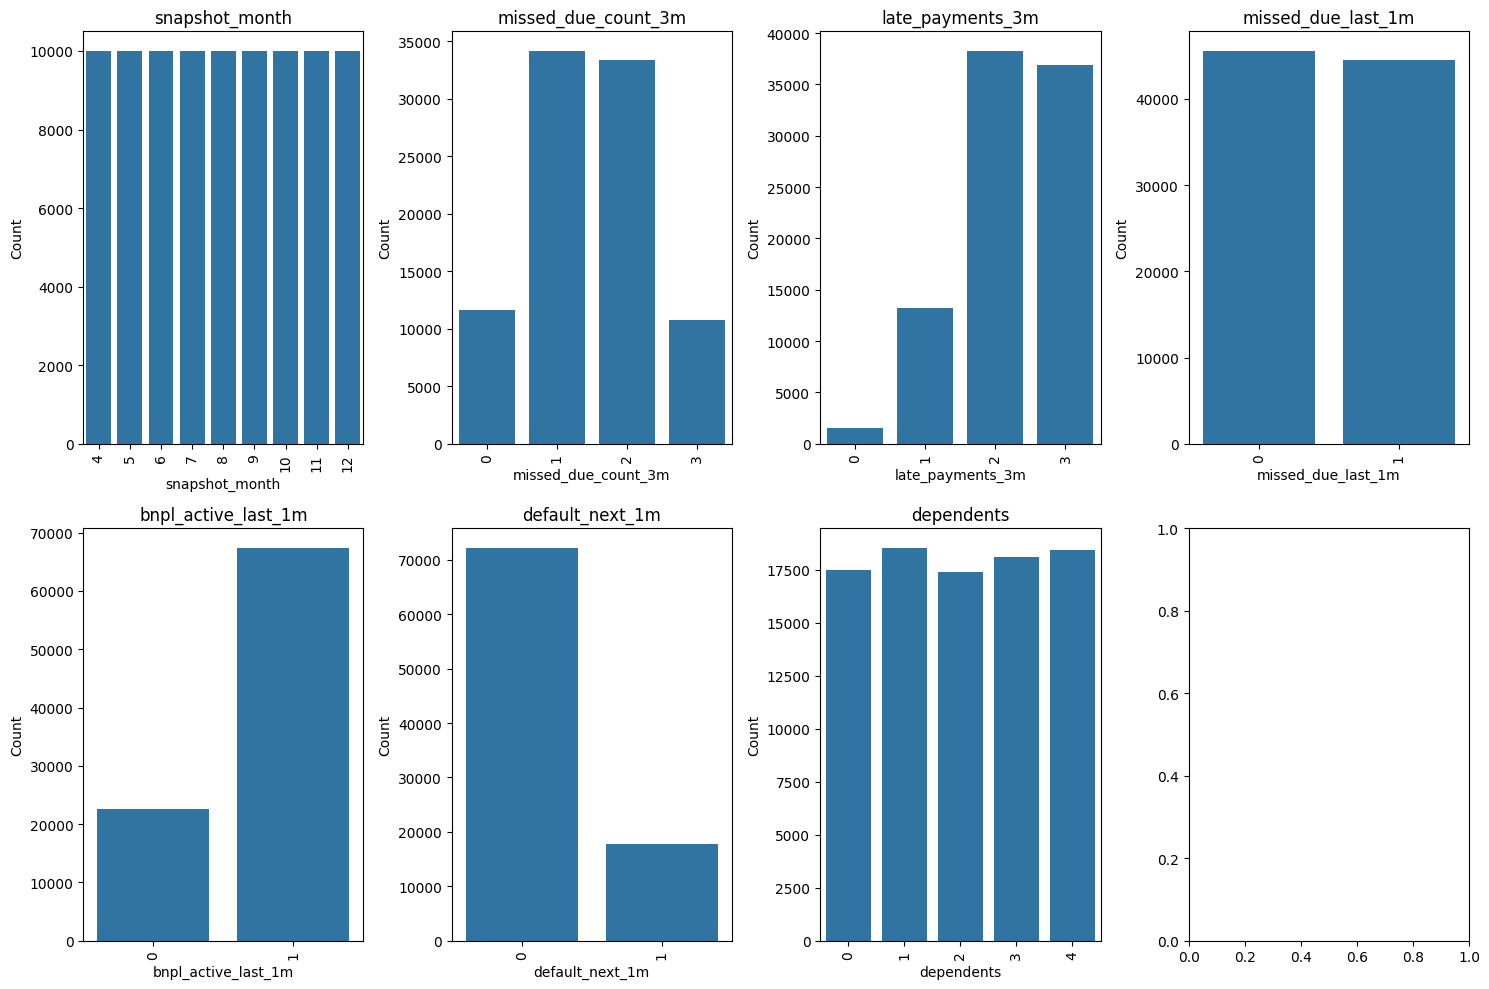

In [11]:
fig,axes = plt.subplots(2,4,figsize=(15,10))
axes = axes.flatten()

for i,col in enumerate(discrete_cols):
  sns.countplot(x=col,data=df,ax=axes[i])
  axes[i].set_title(col)
  axes[i].set_xlabel
  axes[i].set_ylabel('Count')
  axes[i].tick_params(axis='x',rotation=90)
  axes[i].set_xticklabels(axes[i].get_xticklabels(),rotation=90)

plt.tight_layout()
plt.show()


In [12]:
continuous_cols = ['age','account_age_months','util_avg_3m','payment_ratio_avg_3m','max_outstanding_3m',
                  'avg_txn_count_3m','avg_txn_amt_3m','outstanding_delta_3m','monthly_income']
continuous_cols

['age',
 'account_age_months',
 'util_avg_3m',
 'payment_ratio_avg_3m',
 'max_outstanding_3m',
 'avg_txn_count_3m',
 'avg_txn_amt_3m',
 'outstanding_delta_3m',
 'monthly_income']

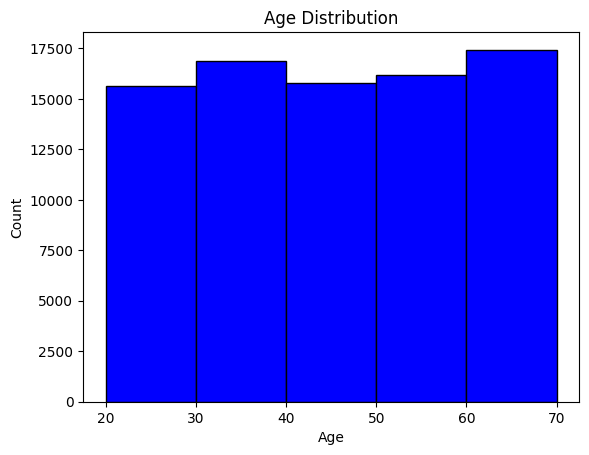

In [13]:
plt.hist(x = df['age'],bins =[20,30,40,50,60,70],color='blue',edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution')
plt.show()

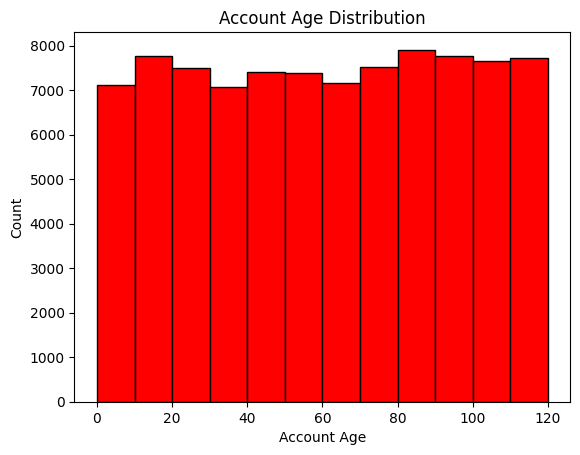

In [14]:
plt.hist(x=df['account_age_months'],bins = [0,10,20,30,40,50,60,70,80,90,100,110,120],edgecolor='black',color='red')
plt.xlabel('Account Age')
plt.ylabel('Count')
plt.title('Account Age Distribution')
plt.show()

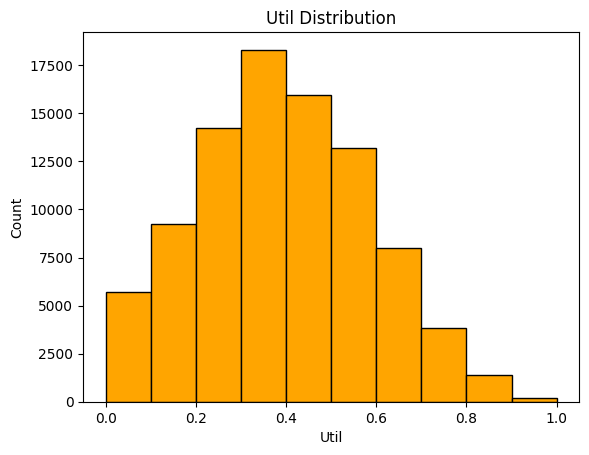

In [15]:
plt.hist(x=df['util_avg_3m'],bins = [0,0.10,0.20,0.30,0.40,0.50,0.60,0.70,0.80,0.90,1],edgecolor='black',color='orange')
plt.xlabel('Util')
plt.ylabel('Count')
plt.title('Util Distribution')
plt.show()

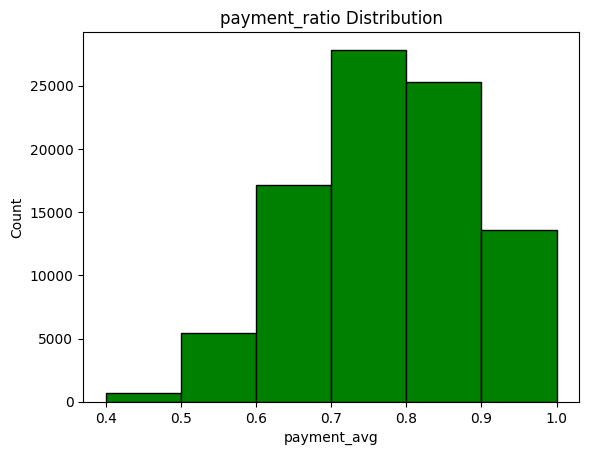

In [16]:
plt.hist(x=df['payment_ratio_avg_3m'],bins = [0.40,0.50,0.60,0.70,0.80,0.90,1],edgecolor='black',color='green')
plt.xlabel('payment_avg')
plt.ylabel('Count')
plt.title('payment_ratio Distribution')
plt.show()

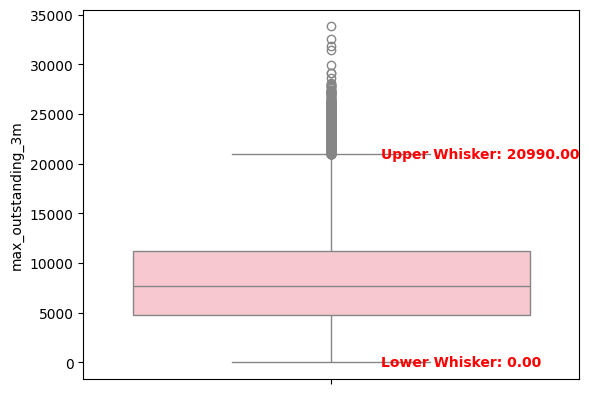

In [17]:
Q1 = df['max_outstanding_3m'].quantile(0.25)
Q3 = df['max_outstanding_3m'].quantile(0.75)
IQR = Q3 - Q1

lower_fence = Q1 - 1.5 * IQR
upper_fence = Q3 + 1.5 * IQR

# Determine the actual whisker values (lowest/highest data points within the fences)
actual_lower_whisker = df['max_outstanding_3m'][df['max_outstanding_3m'] >= lower_fence].min()
actual_upper_whisker = df['max_outstanding_3m'][df['max_outstanding_3m'] <= upper_fence].max()

ax = sns.boxplot(y=df['max_outstanding_3m'], color='pink', orient='v')

# Annotate the actual whisker values on the plot
ax.text(0.1, actual_lower_whisker, f'Lower Whisker: {actual_lower_whisker:.2f}',
        verticalalignment='center', horizontalalignment='left', color='red', weight='bold')
ax.text(0.1, actual_upper_whisker, f'Upper Whisker: {actual_upper_whisker:.2f}',
        verticalalignment='center', horizontalalignment='left', color='red', weight='bold')

plt.show()

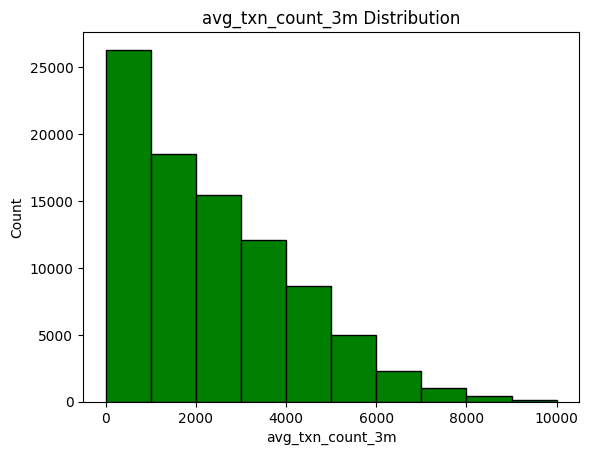

In [18]:

plt.hist(x=df['outstanding_delta_3m'],bins = [0,1000,2000,3000,4000,5000,6000,7000,8000,9000,10000],edgecolor='black',color='green')
plt.xlabel('avg_txn_count_3m')
plt.ylabel('Count')
plt.title('avg_txn_count_3m Distribution')
plt.show()

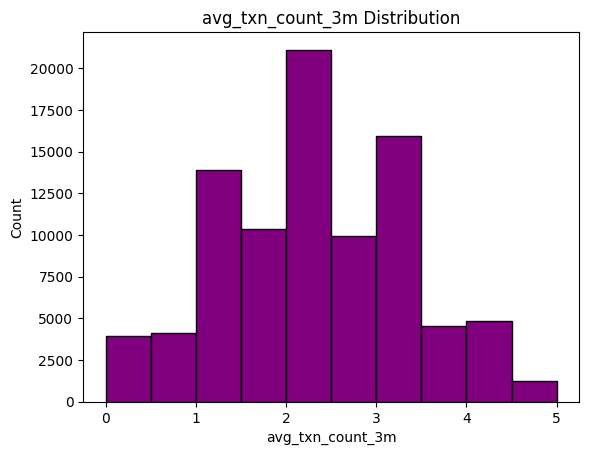

In [19]:
plt.hist(x=df['avg_txn_count_3m'],bins = [0,0.5,1,1.5,2,2.5,3,3.5,4,4.5,5],edgecolor='black',color='purple')
plt.xlabel('avg_txn_count_3m')
plt.ylabel('Count')
plt.title('avg_txn_count_3m Distribution')
plt.show()

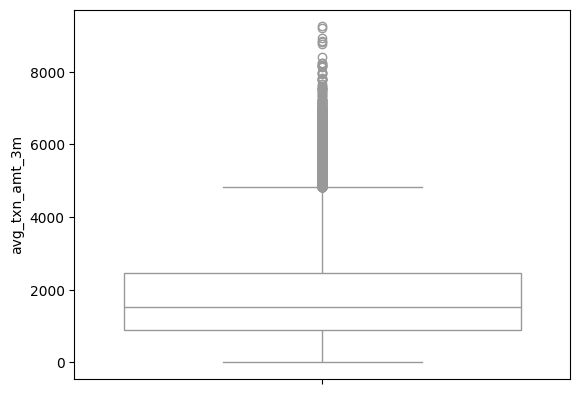

In [20]:
# PLOTTING KDE-PLOT FOR 'avg_txn_count_3m'
sns.boxplot(y=df['avg_txn_amt_3m'], color='white', orient='v')
plt.show()

In [21]:
df['monthly_income'].value_counts()

monthly_income
27161     27
29785     27
29779     27
24817     27
42730     27
          ..
21958      9
30167      9
101127     9
41035      9
23889      9
Name: count, Length: 9322, dtype: int64

Text(0.5, 1.0, 'Monthly Income Distribution')

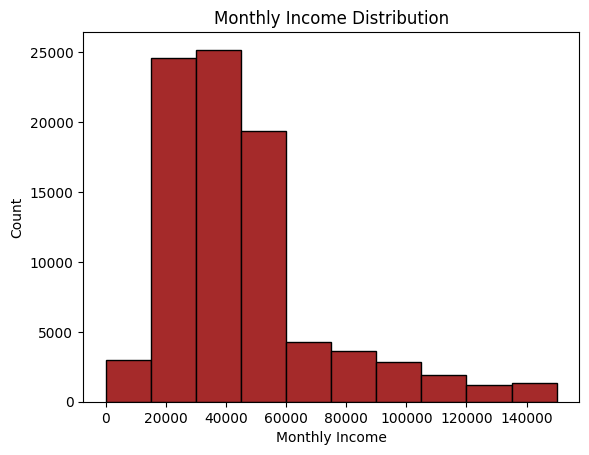

In [22]:
plt.hist(x = df['monthly_income'],bins = [0,15000,30000,45000,60000,75000,90000,105000,120000,135000,150000],edgecolor = 'black',color = 'brown')
plt.xlabel('Monthly Income')
plt.ylabel('Count')
plt.title('Monthly Income Distribution')

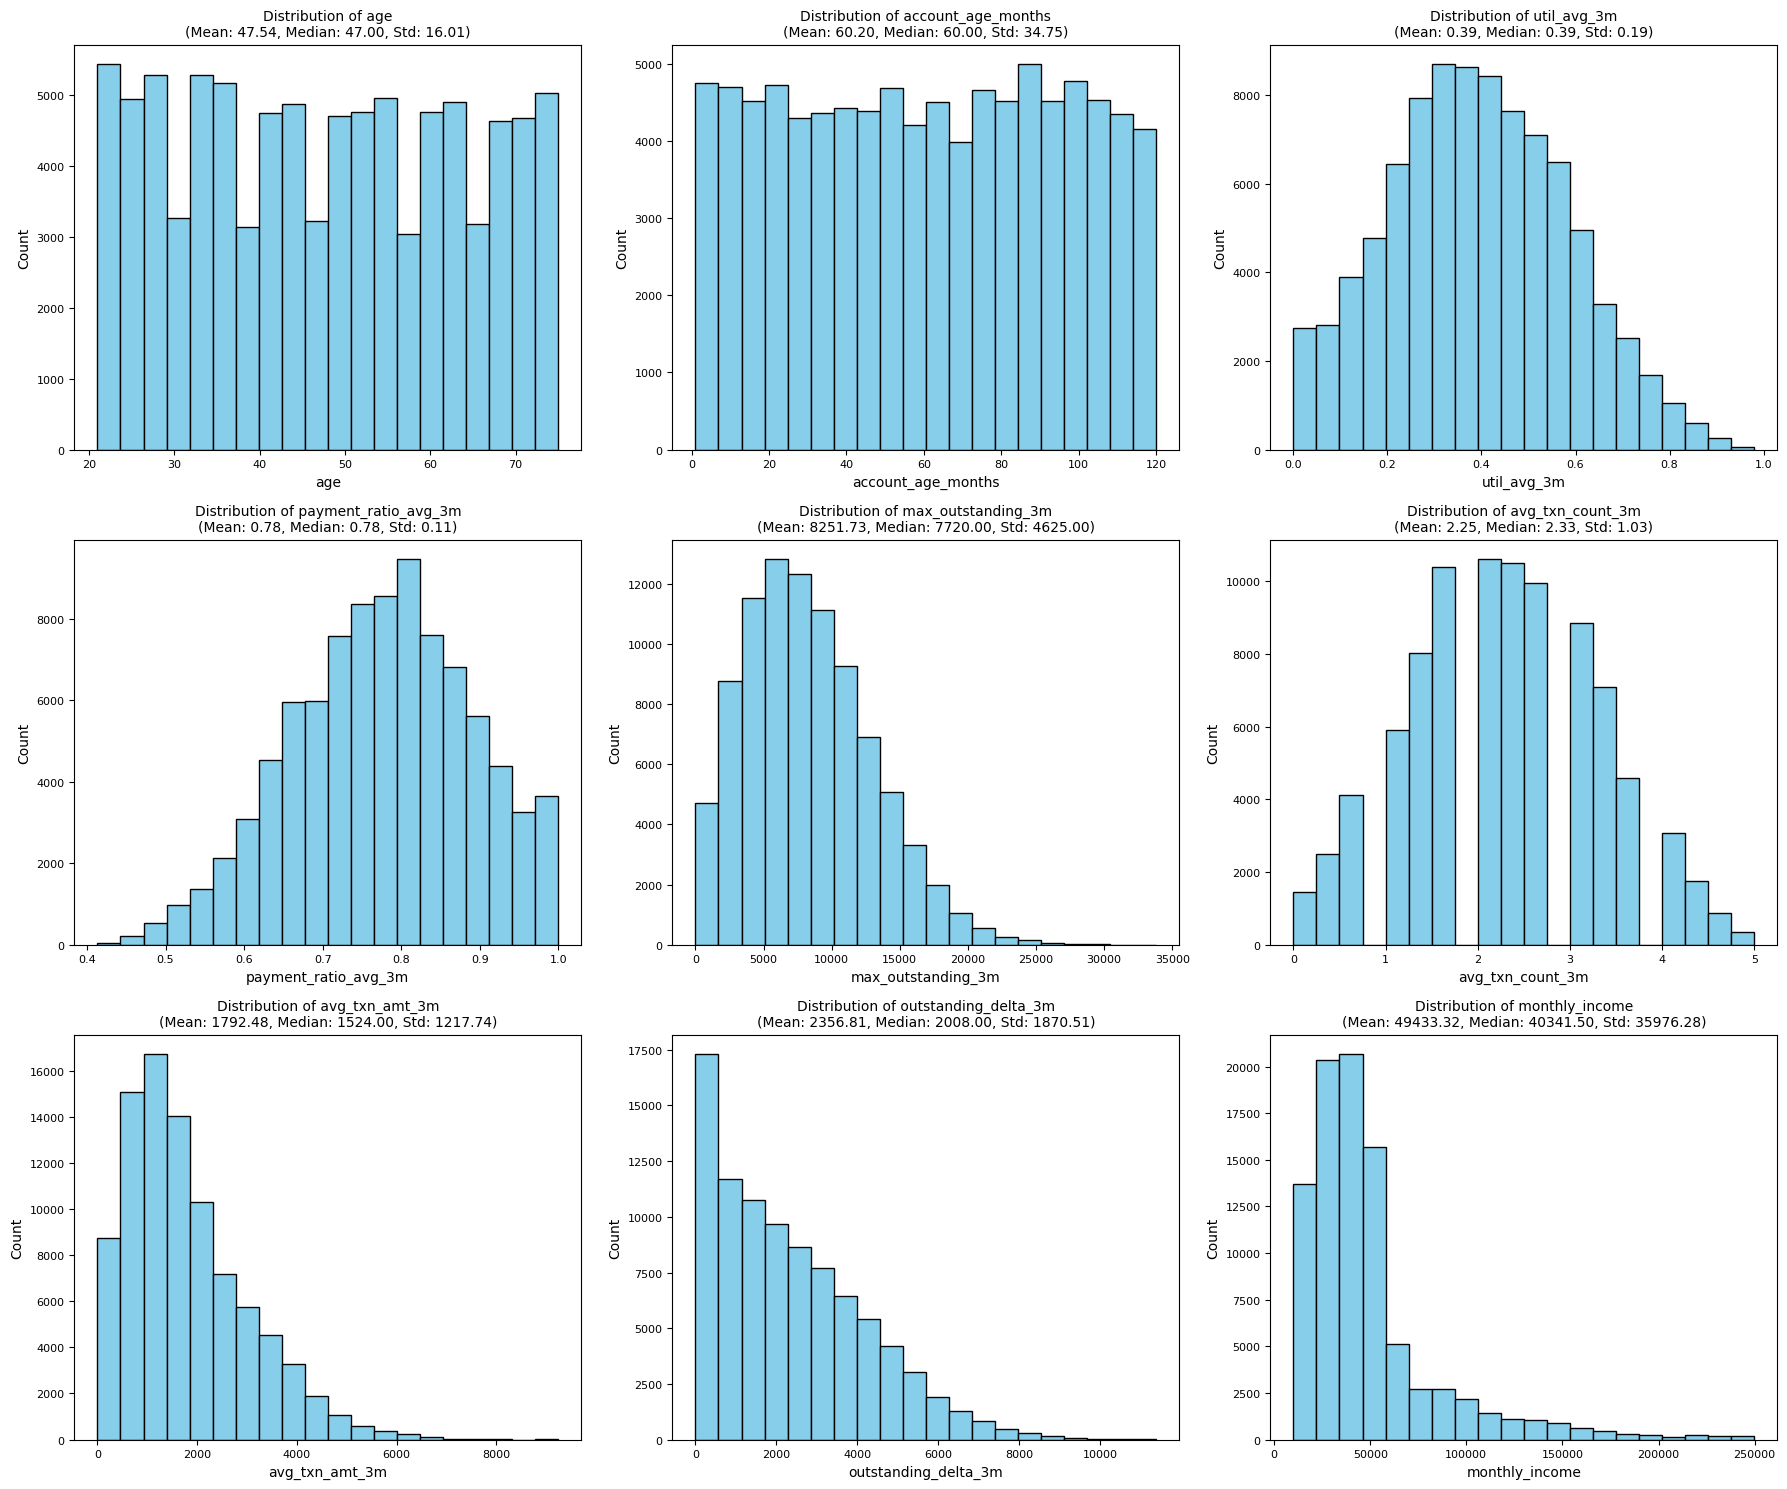

In [23]:
rows = 3
cols = 3

fig, axes = plt.subplots(rows, cols, figsize=(18, 15))
axes = axes.flatten()

for i, col in enumerate(continuous_cols):
    if i < len(continuous_cols):
        # Calculate descriptive statistics
        mean_val = df[col].mean()
        median_val = df[col].median()
        std_val = df[col].std()

        axes[i].hist(df[col], bins=20, edgecolor='black', color='skyblue')
        axes[i].set_title(f'Distribution of {col}\n(Mean: {mean_val:.2f}, Median: {median_val:.2f}, Std: {std_val:.2f})', fontsize=10)
        axes[i].set_xlabel(col, fontsize=10)
        axes[i].set_ylabel('Count', fontsize=10)
        axes[i].tick_params(axis='x', labelsize=8)
        axes[i].tick_params(axis='y', labelsize=8)
    else:
        fig.delaxes(axes[i]) # Remove empty subplots if any

plt.tight_layout()
plt.show()

In [24]:
correlation_matrix = df.corr(method = 'pearson', numeric_only=True)
correlation_matrix

,snapshot_month,util_avg_3m,payment_ratio_avg_3m,max_outstanding_3m,avg_txn_amt_3m,avg_txn_count_3m,late_payments_3m,missed_due_count_3m,missed_due_last_1m,payment_ratio_last_1m,outstanding_delta_3m,bnpl_active_last_1m,default_next_1m,age,monthly_income,dependents,account_age_months
snapshot_month,1.000000e+00,-0.008140,0.002050,0.657162,-0.017959,0.006190,-0.003809,-0.001144,-0.001790,0.001693,-0.004259,-0.001895,0.025885,1.019611e-17,-6.711915e-18,-5.984584e-17,3.909985e-18
util_avg_3m,-8.139761e-03,1.000000,-0.454126,0.361916,0.710917,0.503533,0.680466,0.389951,0.224598,-0.261912,0.606507,0.400865,0.095316,7.415584e-04,-2.698654e-03,-1.905226e-03,9.184433e-04
payment_ratio_avg_3m,2.049719e-03,-0.454126,1.000000,-0.382747,-0.318082,-0.482859,-0.667343,-0.882543,-0.509957,0.577939,-0.639868,-0.382942,-0.176344,6.693468e-03,6.788228e-03,-1.073888e-03,-1.141063e-02
max_outstanding_3m,6.571624e-01,0.361916,-0.382747,1.000000,0.246557,0.189672,0.253066,0.337488,0.193714,-0.220766,0.397876,0.145123,0.100515,-6.997505e-03,-8.893871e-03,-8.634219e-03,9.899809e-03
avg_txn_amt_3m,-1.795852e-02,0.710917,-0.318082,0.246557,1.000000,-0.026699,0.483252,0.273687,0.158117,-0.183041,0.427837,0.284781,0.066692,-5.073148e-03,-6.750683e-03,1.638425e-04,-7.962674e-04
avg_txn_count_3m,6.189661e-03,0.503533,-0.482859,0.189672,-0.026699,1.000000,0.718881,0.416948,0.241054,-0.279222,0.308042,0.423599,0.095065,2.990163e-03,2.328745e-03,3.968643e-03,7.323357e-03
late_payments_3m,-3.808604e-03,0.680466,-0.667343,0.253066,0.483252,0.718881,1.000000,0.578673,0.334025,-0.384295,0.425029,0.570893,0.131635,-3.054444e-03,-5.380475e-03,5.231395e-03,5.683444e-03
missed_due_count_3m,-1.144420e-03,0.389951,-0.882543,0.337488,0.273687,0.416948,0.578673,1.000000,0.578072,-0.510647,0.563042,0.331999,0.184912,-1.099081e-02,-2.919604e-03,3.667260e-03,5.712346e-03
missed_due_last_1m,-1.790309e-03,0.224598,-0.509957,0.193714,0.158117,0.241054,0.334025,0.578072,1.000000,-0.883379,0.488395,0.572432,0.296657,-7.683280e-03,1.423780e-04,1.056967e-03,1.905805e-03
payment_ratio_last_1m,1.692600e-03,-0.261912,0.577939,-0.220766,-0.183041,-0.279222,-0.384295,-0.510647,-0.883379,1.000000,-0.555723,-0.656575,-0.279740,4.259555e-03,9.343809e-04,-2.225699e-04,-5.443421e-03


## DEFINING THE PIPELINES FOR DIFFERENT COLUMNS

In [25]:
# 1)CATEGORICAL PIPELINE
cat_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="constant",fill_value="Unknown",add_indicator = True)),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

In [26]:
log_cols = [
    'monthly_income',
    'avg_txn_amt_3m',
    'max_outstanding_3m',
    'outstanding_delta_3m'
]

numeric_cols = [
    'age',
    'account_age_months',
    'util_avg_3m',
    'payment_ratio_avg_3m',
    'avg_txn_count_3m',
    ## DISCRETE COLS
    'missed_due_count_3m',
    'late_payments_3m',
    'missed_due_last_1m',
    'bnpl_active_last_1m',
    'dependents'
]

In [27]:
numeric_pipeline = ColumnTransformer(
    transformers=[
        (
            "log_num",
            Pipeline([
                ("imputer", SimpleImputer(strategy="median")),
                ("log", FunctionTransformer(np.log1p)),
                ("scaler", StandardScaler())
            ]),
            log_cols
        ),
        (
            "num",
            Pipeline([
                ("imputer", SimpleImputer(strategy="median")),
                ("scaler", StandardScaler())
            ]),
            numeric_cols
        )
    ]
)



In [28]:
preprocessor = ColumnTransformer(
    transformers=[
        ("numeric", numeric_pipeline, log_cols + numeric_cols),
        ("cat", cat_pipeline, categorical_cols)
    ]
)

In [29]:
X = df.drop("default_next_1m", axis=1)
y = df["default_next_1m"]

In [30]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [31]:
from sklearn.linear_model import LogisticRegression
model = Pipeline([
    ("preprocess", preprocessor),
    ("clf", LogisticRegression(
    max_iter=1000,
    C=1.0,              # or even 2.0
    class_weight="balanced",
    solver="lbfgs"
    ))
])
model.fit(X_train, y_train)

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('preprocess', ...), ('clf', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"transformers transformers: list of tuplesList of (name, transformer, columns) tuples specifying thetransformer objects to be applied to subsets of the data.name : str Like in Pipeline and FeatureUnion, this allows the transformer and its parameters to be set using ``set_params`` and searched in grid search.transformer : {'drop', 'passthrough'} or estimator Estimator must support :term:`fit` and :term:`transform`. Special-cased strings 'drop' and 'passthrough' are accepted as well, to indicate to drop the columns or to pass them through untransformed, respectively.columns : str, array-like of str, int, array-like of int, array-like of bool, slice or callable Indexes the data on its second axis. Integers are interpreted as positional columns, while strings can reference DataFrame columns by name. A scalar string or int should be used where ``transformer`` expects X to be a 1d array-like (vector), otherwise a 2d array will be passed to the transformer. A callable is passed the input data `X` and can return any of the above. To select multiple columns by name or dtype, you can use :obj:`make_column_selector`.","[('numeric', ...), ('cat', ...)]"
,"remainder remainder: {'drop', 'passthrough'} or estimator, default='drop'By default, only the specified columns in `transformers` aretransformed and combined in the output, and the non-specifiedcolumns are dropped. (default of ``'drop'``).By specifying ``remainder='passthrough'``, all remaining columns thatwere not specified in `transformers`, but present in the data passedto `fit` will be automatically passed through. This subset of columnsis concatenated with the output of the transformers. For dataframes,extra columns not seen during `fit` will be excluded from the outputof `transform`.By setting ``remainder`` to be an estimator, the remainingnon-specified columns will use the ``remainder`` estimator. Theestimator must support :term:`fit` and :term:`transform`.Note that using this feature requires that the DataFrame columnsinput at :term:`fit` and :term:`transform` have identical order.",'drop'
,"sparse_threshold sparse_threshold: float, default=0.3If the output of the different transformers co

In [32]:
y_pred = model.predict(X_test)

In [33]:
accuracy = accuracy_score(y_test,y_pred)
print(f"THE ACCURACY SCORE IS :{accuracy}")

THE ACCURACY SCORE IS :0.6219444444444444


In [34]:
classification_report = classification_report(y_test,y_pred)
print(f"THE CLASSIFICATION REPORT IS :{classification_report}")

THE CLASSIFICATION REPORT IS :              precision    recall  f1-score   support

           0       0.92      0.58      0.71     14447
           1       0.32      0.80      0.45      3553

    accuracy                           0.62     18000
   macro avg       0.62      0.69      0.58     18000
weighted avg       0.80      0.62      0.66     18000



In [35]:
precision_score = precision_score(y_test,y_pred)
print(f"THE PRECISION SCORE IS :{precision_score}")


THE PRECISION SCORE IS :0.3175084175084175


In [36]:
recall_score = recall_score(y_test,y_pred)
print(f"THE RECALL SCORE IS :{recall_score}")
#

THE RECALL SCORE IS :0.796228539262595


In [37]:
from sklearn.metrics import roc_auc_score
p = model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, p)
print("ROC-AUC:", roc_auc)

ROC-AUC: 0.7094552502249601


In [38]:
roc_curve = roc_curve(y_test,y_pred)
print(f"THE ROC CURVE IS :{roc_curve}")

THE ROC CURVE IS :(array([0.        , 0.42091784, 1.        ]), array([0.        , 0.79622854, 1.        ]), array([inf,  1.,  0.]))


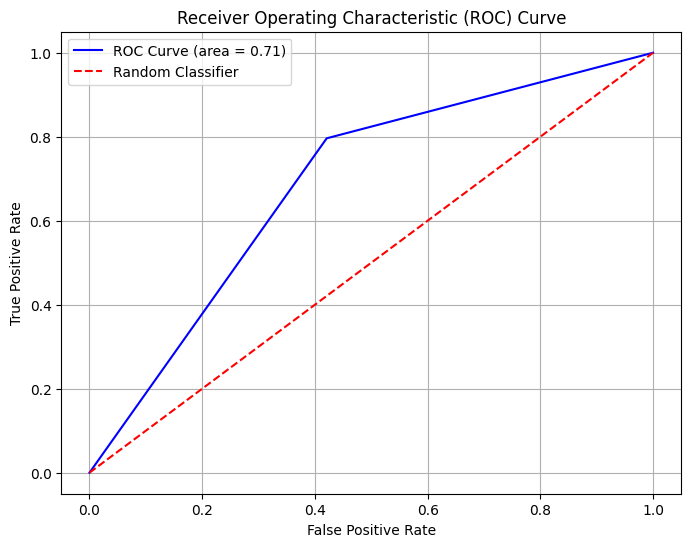

In [39]:
fpr, tpr, thresholds = roc_curve

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label='ROC Curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.grid(True)
plt.show()

In [40]:
from sklearn.metrics import log_loss
print("Log Loss:", log_loss(y_test, p))

Log Loss: 0.616287488502181


In [41]:
from sklearn.metrics import average_precision_score
print("PR-AUC:", average_precision_score(y_test, p))

PR-AUC: 0.31526468291903137


In [42]:
default_rate = y_test.mean()
print("Default rate:", default_rate)

Default rate: 0.1973888888888889


In [43]:
import pandas as pd

p = model.predict_proba(X_test)[:, 1]

df_eval = pd.DataFrame({
    "y": y_test,
    "p": p
})

df_eval["decile"] = pd.qcut(df_eval["p"], 10, labels=False)

print(df_eval.groupby("decile")["y"].mean())


decile
0    0.045000
1    0.051111
2    0.072778
3    0.101667
4    0.127222
5    0.267222
6    0.315556
7    0.333333
8    0.324444
9    0.335556
Name: y, dtype: float64


In [44]:
cold = X_test.copy()

history_cols = [
    "util_avg_3m",
    "payment_ratio_avg_3m",
    "max_outstanding_3m",
    "avg_txn_amt_3m",
    "avg_txn_count_3m",
    "late_payments_3m",
    "missed_due_count_3m",
    "missed_due_last_1m",
    "payment_ratio_last_1m",
    "outstanding_delta_3m",
    "bnpl_active_last_1m"
]

cold[history_cols] = 0

p_cold = model.predict_proba(cold)[:, 1]
print("Cold-start avg risk:", p_cold.mean())


Cold-start avg risk: 0.04406711876937016


In [45]:
base = X_test.iloc[[0]].copy()

high_risk = base.copy()
# Update values using .loc for explicit row and column assignment
for col, value in {
    "missed_due_last_1m": 1,
    "payment_ratio_last_1m": 0.3,
    "missed_due_count_3m": 3,
    "late_payments_3m": 3,
    "util_avg_3m": 0.9,
    "outstanding_delta_3m": 8000,
    "bnpl_active_last_1m": 1
}.items():
    high_risk.loc[high_risk.index[0], col] = value

low_risk = base.copy()
# Update values using .loc for explicit row and column assignment
for col, value in {
    "missed_due_last_1m": 0,
    "payment_ratio_last_1m": 1.0,
    "missed_due_count_3m": 0,
    "late_payments_3m": 0,
    "util_avg_3m": 0.2,
    "outstanding_delta_3m": 0,
    "bnpl_active_last_1m": 1
}.items():
    low_risk.loc[low_risk.index[0], col] = value

print("High risk p:", model.predict_proba(high_risk)[0, 1])
print("Low  risk p:", model.predict_proba(low_risk)[0, 1])

High risk p: 0.6578099587656483
Low  risk p: 0.31762688952578755


In [46]:
def prob_to_credit_score(p):
    score = 900 - (p * 600)
    return int(max(300, min(score, 900)))

In [47]:
p_test = model.predict_proba(X_test)[:, 1]

In [48]:
def score_band(score):
    if score >= 750:
        return "Approve"
    elif score >= 650:
        return "Approve_Low_Limit"
    elif score >= 550:
        return "Conditional"
    else:
        return "Reject"


In [49]:
final_output = pd.DataFrame({
    "demo_customer_id": range(1, len(p_test) + 1),
    "credit_score": [prob_to_credit_score(p) for p in p_test]
})

final_output["final_decision"] = final_output["credit_score"].apply(score_band)


In [50]:
print(final_output.head(10))

final_output.to_csv("bnpl_demo_output.csv", index=False)


   demo_customer_id  credit_score     final_decision
0                 1           679  Approve_Low_Limit
1                 2           516             Reject
2                 3           728  Approve_Low_Limit
3                 4           506             Reject
4                 5           750            Approve
5                 6           518             Reject
6                 7           719  Approve_Low_Limit
7                 8           783            Approve
8                 9           685  Approve_Low_Limit
9                10           831            Approve


In [52]:
bnpl_out = pd.read_csv('bnpl_demo_output.csv')

In [53]:
bnpl_out['credit_score'].min()

np.int64(466)

In [54]:
bnpl_out['credit_score'].max()

np.int64(883)

In [55]:
bnpl_out['final_decision'].value_counts()

final_decision
Reject               8634
Approve              4698
Approve_Low_Limit    4377
Conditional           291
Name: count, dtype: int64

In [57]:
import pandas as pd

new_customer = pd.DataFrame([{
    # -------- Static profile --------
    "age": 28,
    "account_age_months": 2,
    "monthly_income": 42000,
    "dependents": 1,
    "employment_status": "Salaried",
    "education_level": "Graduate",
    "city_tier": "Tier-2",
    "residence_type": "Rented",

    # -------- Behavioral (cold start = neutral) --------
    "util_avg_3m": 0,
    "payment_ratio_avg_3m": 1.0,
    "avg_txn_count_3m": 0,
    "avg_txn_amt_3m": 0,
    "max_outstanding_3m": 0,
    "outstanding_delta_3m": 0,

    "missed_due_count_3m": 0,
    "late_payments_3m": 0,
    "missed_due_last_1m": 0,
    "bnpl_active_last_1m": 0
}])


In [58]:
p_new = model.predict_proba(new_customer)[0, 1]
print("Default probability:", p_new)


Default probability: 0.03223960178338458


In [59]:
def prob_to_credit_score(p):
    score = 900 - (p * 600)
    return int(max(300, min(score, 900)))

score = prob_to_credit_score(p_new)
print("Credit score:", score)


Credit score: 880


In [60]:
def final_decision(score):
    if score >= 750:
        return "Approve"
    elif score >= 650:
        return "Approve_Low_Limit"
    elif score >= 550:
        return "Conditional"
    else:
        return "Reject"

decision = final_decision(score)
print("Decision:", decision)


Decision: Approve


In [61]:
# Evaluate test points and save scored output
import pandas as pd

try:
    test = pd.read_csv("bnpl_test_points.csv")
except Exception as e:
    print("Error loading test CSV:", e)
    raise

try:
    p = model.predict_proba(test)[:, 1]
    scores = [prob_to_credit_score(pi) for pi in p]

    out = test.copy()
    out["default_prob"] = p
    out["credit_score"] = scores

    def score_band(score):
        if score >= 750:
            return "Approve"
        elif score >= 650:
            return "Approve_Low_Limit"
        elif score >= 550:
            return "Conditional"
        else:
            return "Reject"

    out["decision"] = out["credit_score"].apply(score_band)

    display_cols = ["age", "monthly_income", "util_avg_3m", "default_prob", "credit_score", "decision"]
    print(out[display_cols].to_string(index=False))

    out.to_csv("bnpl_test_points_scored.csv", index=False)
    print('\nScored rows saved to bnpl_test_points_scored.csv')

except NameError as ne:
    print("Model or helper functions not found. Make sure `model` and `prob_to_credit_score` are defined earlier in the notebook.")
    raise
except Exception as e:
    print("Error during prediction:", e)
    raise


 age  monthly_income  util_avg_3m  default_prob  credit_score          decision
  30           60000         0.20      0.131956           820           Approve
  22           20000         0.90      0.658286           505            Reject
  45          120000         0.10      0.098025           841           Approve
  28           42000         0.00      0.032219           880           Approve
  35           35000         0.50      0.281695           730 Approve_Low_Limit
  50           80000         0.15      0.116787           829           Approve
  26           15000         0.85      0.653798           507            Reject
  40           48000         0.30      0.143730           813           Approve
  31           28000         0.60      0.294394           723 Approve_Low_Limit
  60          100000         0.05      0.079949           852           Approve

Scored rows saved to bnpl_test_points_scored.csv
